In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from geopy.distance import great_circle
import seaborn as sns
import datetime

In [ ]:
train=pd.read_csv('/content/gdrive/My Drive/Datasets/NYC Taxi Kaggle/train.csv')
test=pd.read_csv('/content/gdrive/My Drive/Datasets/NYC Taxi Kaggle/test.csv')
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:

#train.passenger_count.unique()

array([1, 6, 4, 2, 3, 5, 0, 7, 9, 8])

In [ ]:
train['distance']=train.apply(lambda row: great_circle((row.pickup_latitude,row.pickup_longitude), (row.dropoff_latitude, row.dropoff_longitude)).km, axis=1)


In [ ]:
test['distance']=test.apply(lambda row: great_circle((row.pickup_latitude,row.pickup_longitude), (row.dropoff_latitude, row.dropoff_longitude)).km, axis=1)


In [ ]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385108
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590


In [ ]:
train['pickup_datetime']=pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime']=pd.to_datetime(train['dropoff_datetime'])

test['pickup_datetime']=pd.to_datetime(test['pickup_datetime'])


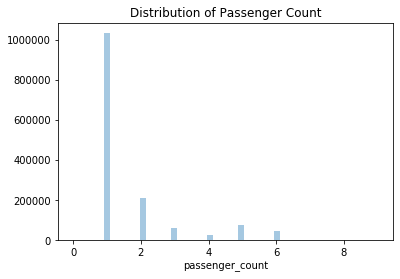

In [ ]:
sns.distplot(train['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

In [ ]:
train['pickup_day']=train['pickup_datetime'].dt.day_name()
train['dropoff_day']=train['dropoff_datetime'].dt.day_name()


test['pickup_day']=test['pickup_datetime'].dt.day_name()
train.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,Sunday,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385108,Tuesday,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485501,Wednesday,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,Saturday,Saturday


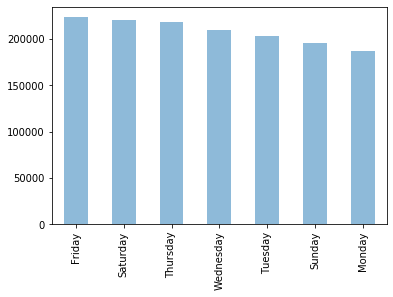

In [ ]:
train.pickup_day.value_counts(normalize=False).plot(kind='bar', alpha=0.5)

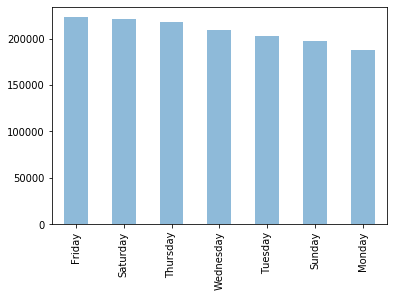

In [ ]:
train.dropoff_day.value_counts(normalize=False).plot(kind='bar', alpha=0.5)

In [ ]:
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
train['pickup_timezone']=train['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
train['dropoff_timezone']=train['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

test['pickup_timezone']=test['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

In [ ]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_day,dropoff_day,pickup_timezone,dropoff_timezone
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,Monday,Monday,evening,evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,Sunday,Sunday,late night,late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385108,Tuesday,Tuesday,midday,midday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485501,Wednesday,Wednesday,evening,evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,Saturday,Saturday,midday,midday


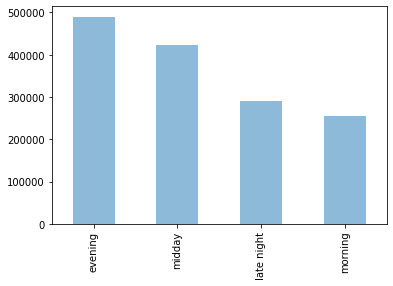

In [ ]:
train.pickup_timezone.value_counts(normalize=False).plot(kind='bar', alpha=0.5)


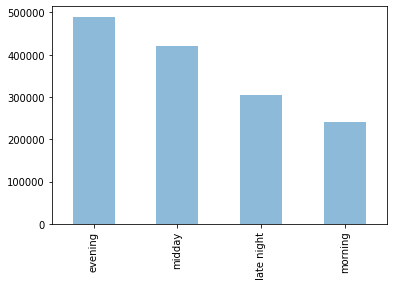

In [ ]:
train.dropoff_timezone.value_counts(normalize=False).plot(kind='bar', alpha=0.5)

Text(0.5, 1.0, 'A boxplot depicting the pickup duration distribution')

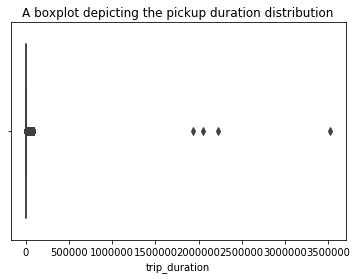

In [ ]:
sns.boxplot(train['trip_duration'], orient='horizontal')
plt.title('A boxplot depicting the pickup duration distribution')

In [ ]:
print( train['trip_duration'].nlargest(10))

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
295382       86391
73816        86390
59891        86387
1360439      86385
753765       86379
Name: trip_duration, dtype: int64


In [ ]:
train=train[train.trip_duration!=train.trip_duration.max()]

In [ ]:
print( train['trip_duration'].nlargest(10))

924150     2227612
680594     2049578
355003     1939736
1234291      86392
295382       86391
73816        86390
59891        86387
1360439      86385
753765       86379
91717        86378
Name: trip_duration, dtype: int64


In [ ]:
train=train[train.trip_duration!=train.trip_duration.max()]
train=train[train.trip_duration!=train.trip_duration.max()]
train=train[train.trip_duration!=train.trip_duration.max()]
print( train['trip_duration'].nlargest(10))

1234291    86392
295382     86391
73816      86390
59891      86387
1360439    86385
753765     86379
91717      86378
1221666    86378
66346      86377
1138915    86377
Name: trip_duration, dtype: int64


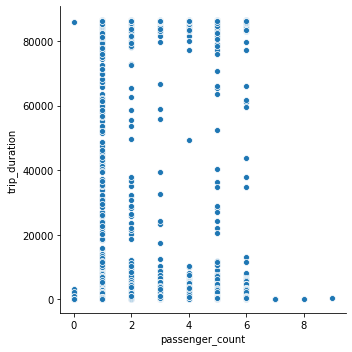

In [ ]:
sns.relplot(x="passenger_count", y="trip_duration",data=train, kind="scatter")

In [ ]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_day,dropoff_day,pickup_timezone,dropoff_timezone
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,Monday,Monday,evening,evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,Sunday,Sunday,late night,late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385108,Tuesday,Tuesday,midday,midday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485501,Wednesday,Wednesday,evening,evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,Saturday,Saturday,midday,midday


In [ ]:
#train['trip_duration']=train['trip_duration'].apply(lambda x:x/3600)

In [ ]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,pickup_day,pickup_timezone
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2.746430,Thursday,late night
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2.759243,Thursday,late night
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,1.306157,Thursday,late night
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,5.269095,Thursday,late night
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,0.960843,Thursday,late night


In [ ]:
print( train['trip_duration'].nlargest(10))

1234291    86392
295382     86391
73816      86390
59891      86387
1360439    86385
753765     86379
91717      86378
1221666    86378
66346      86377
1138915    86377
Name: trip_duration, dtype: int64


In [ ]:
train.loc[train['store_and_fwd_flag']=='N', 'store_and_fwd_flag']=0
train.loc[train['store_and_fwd_flag']=='Y', 'store_and_fwd_flag']=1
test.loc[test['store_and_fwd_flag']=='N', 'store_and_fwd_flag']=0
test.loc[test['store_and_fwd_flag']=='Y', 'store_and_fwd_flag']=1



train.loc[train['pickup_day']=='Monday', 'pickup_day']=0
train.loc[train['pickup_day']=='Tuesday', 'pickup_day']=1
train.loc[train['pickup_day']=='Wednesday', 'pickup_day']=2
train.loc[train['pickup_day']=='Thursday', 'pickup_day']=3
train.loc[train['pickup_day']=='Friday', 'pickup_day']=4
train.loc[train['pickup_day']=='Saturday', 'pickup_day']=5
train.loc[train['pickup_day']=='Sunday', 'pickup_day']=6

test.loc[test['pickup_day']=='Monday', 'pickup_day']=0
test.loc[test['pickup_day']=='Tuesday', 'pickup_day']=1
test.loc[test['pickup_day']=='Wednesday', 'pickup_day']=2
test.loc[test['pickup_day']=='Thursday', 'pickup_day']=3
test.loc[test['pickup_day']=='Friday', 'pickup_day']=4
test.loc[test['pickup_day']=='Saturday', 'pickup_day']=5
test.loc[test['pickup_day']=='Sunday', 'pickup_day']=6

train.loc[train['dropoff_day']=='Monday', 'dropoff_day']=0
train.loc[train['dropoff_day']=='Tuesday', 'dropoff_day']=1
train.loc[train['dropoff_day']=='Wednesday', 'dropoff_day']=2
train.loc[train['dropoff_day']=='Thursday', 'dropoff_day']=3
train.loc[train['dropoff_day']=='Friday', 'dropoff_day']=4
train.loc[train['dropoff_day']=='Saturday', 'dropoff_day']=5
train.loc[train['dropoff_day']=='Sunday', 'dropoff_day']=6

train.loc[train['pickup_timezone']=='morning', 'pickup_timezone']=0
train.loc[train['pickup_timezone']=='midday', 'pickup_timezone']=1
train.loc[train['pickup_timezone']=='evening', 'pickup_timezone']=2
train.loc[train['pickup_timezone']=='late night', 'pickup_timezone']=3

test.loc[test['pickup_timezone']=='morning', 'pickup_timezone']=0
test.loc[test['pickup_timezone']=='midday', 'pickup_timezone']=1
test.loc[test['pickup_timezone']=='evening', 'pickup_timezone']=2
test.loc[test['pickup_timezone']=='late night', 'pickup_timezone']=3

train.loc[train['dropoff_timezone']=='morning', 'dropoff_timezone']=0
train.loc[train['dropoff_timezone']=='midday', 'dropoff_timezone']=1
train.loc[train['dropoff_timezone']=='evening', 'dropoff_timezone']=2
train.loc[train['dropoff_timezone']=='late night', 'dropoff_timezone']=3

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [ ]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_day,dropoff_day,pickup_timezone,dropoff_timezone
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,1.498523,0,0,2,2
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,1.805510,6,6,3,3
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,6.385108,1,1,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,1.485501,2,2,2,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,1.188590,5,5,1,1


In [ ]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,pickup_day,pickup_timezone
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,0,2.746430,3,3
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,0,2.759243,3,3
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0,1.306157,3,3
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,0,5.269095,3,3
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0,0.960843,3,3


In [ ]:
train.drop(['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1, inplace=True)
#test.drop(['id', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1, inplace=True)



In [ ]:
train.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance,pickup_day,dropoff_day,pickup_timezone,dropoff_timezone
0,2,1,0,455,1.498523,0,0,2,2
1,1,1,0,663,1.805510,6,6,3,3
2,2,1,0,2124,6.385108,1,1,1,1
3,2,1,0,429,1.485501,2,2,2,2
4,2,1,0,435,1.188590,5,5,1,1


In [ ]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,pickup_day,pickup_timezone
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,0,2.746430,3,3
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,0,2.759243,3,3
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0,1.306157,3,3
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,0,5.269095,3,3
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0,0.960843,3,3


In [ ]:
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X_train=train.drop(['trip_duration', 'dropoff_timezone', 'dropoff_day'], axis=1).copy()
Y_train= train['trip_duration']
X_test=test.drop(['id', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', ], axis=1).copy()

print(X_train.shape,Y_train.shape,X_test.shape)


classifier=linear_model.LinearRegression()
classifier1=classifier.fit(X_train, Y_train)

print (classifier1.score(X_train, Y_train))
Y_pred=classifier.predict(X_test)

poly=preprocessing.PolynomialFeatures(degree=2)
poly_features=poly.fit_transform(X_train)
classifier=linear_model.LinearRegression()
classifier1=classifier.fit(poly_features, Y_train)
print (classifier1.score(poly_features, Y_train))


(1458640, 6) (1458640,) (625134, 6)
0.024321709398382185
0.029003939130072154


In [ ]:
from sklearn import tree, model_selection

#X_train=train.drop(['trip_duration', 'dropoff_timezone', 'dropoff_day'], axis=1).copy()
#Y_train= train['trip_duration']
#X_test=test.drop(['id', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1).copy()
decision_tree=tree.DecisionTreeClassifier(criterion='gini',splitter='random',random_state=1, max_depth=3, min_samples_split=2)
dec_tree1=decision_tree.fit(X_train,Y_train)
#print ("Training set accuracy: ", dec_tree1.score(X_train,Y_train))
scores=model_selection.cross_val_score(decision_tree,X_train,Y_train,scoring='accuracy', cv=50)
print (scores)
print ("Validation set accuracy is:", scores.mean())



acc_decision_tree=round(decision_tree.score(X_train, Y_train) * 100, 2)
print("Accuracy of training set is:", acc_decision_tree)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=50.
  % (min_groups, self.n_splits)), UserWarning)


[0.00099407 0.00123402 0.00113118 0.00085696 0.00106263 0.00082268
 0.00099407 0.00099407 0.00137113 0.00137113 0.00113118 0.00116546
 0.00071984 0.0010969  0.00089124 0.00102835 0.00092551 0.00095979
 0.00095979 0.00133685 0.00123402 0.00099407 0.0010969  0.00099407
 0.00113118 0.00089124 0.00123402 0.00113118 0.00113118 0.0012683
 0.00116546 0.00089124 0.00092551 0.00106263 0.00113118 0.00099407
 0.00099407 0.0010969  0.00082268 0.00089124 0.00106266 0.00130262
 0.00126834 0.00092555 0.00123406 0.00123406 0.00089127 0.00092555
 0.0009941  0.00109694]
Validation set accuracy is: 0.0010612627670402686


In [ ]:
# Labels are the values we want to predict
labels = np.array(train['trip_duration'])
# Remove the labels from the features
# axis 1 refers to the columns
features= train.drop(['trip_duration','dropoff_timezone', 'dropoff_day'], axis = 1)
# Saving feature names for later use
feature_list = list(X_train.columns)
# Convert to numpy array
features = np.array(X_train)

In [ ]:
test_features=np.array(X_test)



In [ ]:
pip install scitime

     |████████████████████████████████| 45.9MB 77kB/s 


In [ ]:
from scitime import Estimator
from sklearn.ensemble import RandomForestRegressor
estimator=Estimator()
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_depth=10)
estimation, lower_bound, upper_bound = estimator.time(rf, features, labels )

scitime.estimate.Estimator:DEBUG:The model would fit. Moving on
scitime.estimate.Estimator:DEBUG:Fetching estimator: RF_RandomForestRegressor_estimator.pkl
scitime.estimate.Estimator:INFO:Training your model for these params: {'total_memory': [27395407872], 'available_memory': [25236934656], 'num_cpu': [4], 'num_rows': [1458640], 'num_features': [6], 'n_estimators': [1000], 'max_depth': [10], 'min_samples_split': [2], 'min_samples_leaf': [1], 'min_weight_fraction_leaf': [0.0], 'max_features': ['auto'], 'criterion': ['mse'], 'max_leaf_nodes': [None], 'min_impurity_decrease': [0.0], 'min_impurity_split': [None], 'bootstrap': [True], 'oob_score': [False], 'n_jobs': [None]}
scitime.estimate.Estimator:INFO:Transforming dataset for semi dummy features
scitime.estimate.Estimator:WARNING:Parameters ['random_state', 'ccp_alpha', 'warm_start', 'max_samples', 'verbose'] will not be accounted for
scitime.estimate.Estimator:INFO:Training your RandomForestRegressor model should take ~ 1 hour and 8
 

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
#rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(features, labels)
Y_pred= rf.predict(test_features)

In [ ]:
submission=pd.DataFrame({"id": test['id'], "trip_duration": Y_pred})
submission.to_csv('submission_1000RF_10.csv')